# Задание
1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
3. Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
4. Проанализируйте CTR с разбивкой по рекламной кампании.
5. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
7. Посчитайте конверсию из клика в покупку.
# Описание данных
* ad_id – идентификатор объявления (рекламы)
* xyz_campaign_id – идентификатор рекламной кампании в базе компании X
* fb_campaign_id – идентификатор кампании в Facebook
* age – возрастная группа, которой показывалась реклама
* gender – пол тех, кому показывалась реклама
* interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
* impressions – число показов
* clicks – число кликов
* spent – сумма, которую компания потратила на показ объявления 
* total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
* approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [57]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(40,40)}
)

In [3]:
df = pd.read_csv('conversion.csv')

In [7]:
df.fb_campaign_id.nunique()

691

In [22]:
df.groupby('fb_campaign_id').Impressions.sum()

fb_campaign_id
103916       7350
103917      17861
103920        693
103928       8392
103929       1915
           ...   
179977    1129773
179978     637549
179979     151531
179981     790253
179982     513161
Name: Impressions, Length: 691, dtype: int64

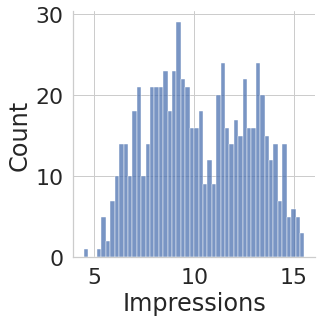

In [23]:
sns.displot(np.log(df.groupby('fb_campaign_id').Impressions.sum()), kde=False, bins = 50)

In [31]:
df['CTR'] = df.Clicks / df.Impressions

In [36]:
df.sort_values('CTR')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
434,950109,936,123445,30-34,M,20,343,0,0.00,1,1,0.000000
467,951021,936,123597,30-34,F,7,457,0,0.00,1,1,0.000000
516,952080,936,123774,40-44,F,27,415,0,0.00,1,0,0.000000
181,747879,936,110947,30-34,F,30,493,0,0.00,1,0,0.000000
182,747903,936,110951,30-34,F,63,1491,0,0.00,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845


In [48]:
df.query('xyz_campaign_id == 916').CTR

0     0.000136
1     0.000112
2     0.000000
3     0.000235
4     0.000242
5     0.000000
6     0.000192
7     0.000091
8     0.000425
9     0.000316
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000477
15    0.000000
16    0.000434
17    0.000000
18    0.000216
19    0.000190
20    0.000000
21    0.000280
22    0.000164
23    0.000164
24    0.000000
25    0.000000
26    0.000269
27    0.000209
28    0.000182
29    0.000000
30    0.000000
31    0.000294
32    0.000254
33    0.000438
34    0.000458
35    0.000000
36    0.000243
37    0.000324
38    0.000199
39    0.000181
40    0.000000
41    0.000000
42    0.000186
43    0.000315
44    0.000000
45    0.000384
46    0.000399
47    0.000341
48    0.000359
49    0.000262
50    0.000357
51    0.000000
52    0.000398
53    0.000000
Name: CTR, dtype: float64

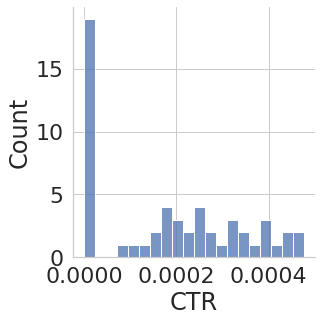

In [58]:
sns.displot(df.query('xyz_campaign_id == 916').CTR, kde=False, bins = 20)

In [59]:
df['CPC'] = df.Spent / df.Clicks

In [60]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171,1.471926


In [64]:
ss.iqr(df.CPC, nan_policy='omit').round(2)

0.25

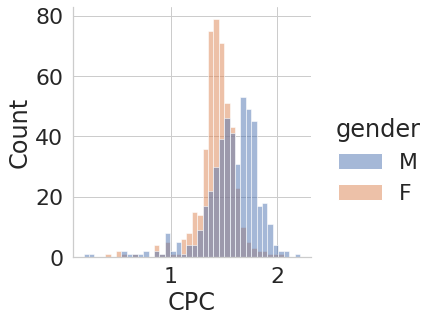

In [70]:
sns.displot(x = 'CPC', hue = 'gender', data = df.dropna())

In [73]:
df['CR'] = (df.Approved_Conversion / df.Clicks).mul(100).round(2)

In [78]:
df[df.ad_id == 1121814]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,3.09
